**Importing The dependencis**

In [4]:
pip install xgboost

  Using cached xgboost-2.0.1-py3-none-win_amd64.whl (99.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c conda-forge xgboost


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: xgboost


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [8]:
house_price_dataset = sklearn.datasets.load_boston()

In [12]:
house_price_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [14]:
#Loading the dataset to a Pandas Dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, 
            columns=house_price_dataset.feature_names)

In [15]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
# Add the target (price) column to the DataFrame

house_price_dataframe['target'] = house_price_dataset.target

In [17]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
house_price_dataframe.shape

(506, 14)

In [19]:
# Check for missing values

house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [20]:
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Uderstanding the correlation between various features in the Dataset

In [21]:
house_price_dataframe.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

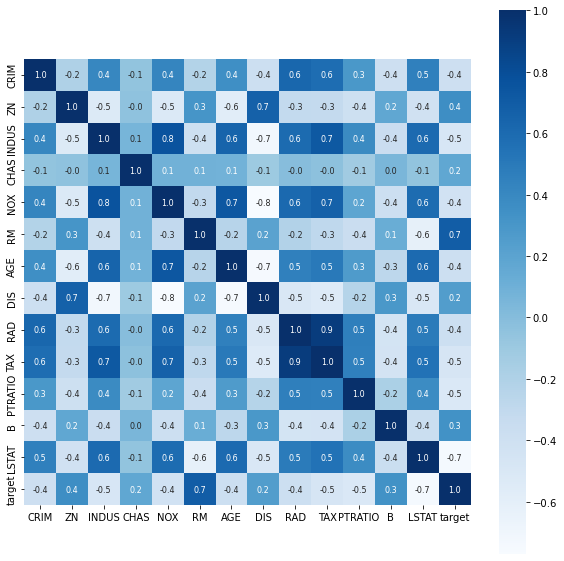

In [29]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
correlation = house_price_dataframe.corr()
sns.heatmap(correlation,cbar=True,square=True, fmt='.1f',annot=True,
           annot_kws={'size':8},cmap='Blues')

# cbar = colorbar
#fmt = how many float point .1f means after point only one value
# annot = annotation such as ZN CRIM etc. 
# annot_kws = annotation size
# cmap = color map

In [31]:
x = house_price_dataframe.drop(['target'],axis=1)
y= house_price_dataframe['target']

In [32]:
x_train, x_test, y_train,y_test = train_test_split(x,y,
                                        test_size=0.2,random_state=0)
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


**Model Training**

In [33]:
model = XGBRegressor()

In [34]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluatoin**

In [41]:
#pridiction on test data
training_data_prediction = model.predict(x_train)

In [42]:
print(training_data_prediction)

[26.678207  21.701773  22.00402   22.857695  10.387396  21.897083
 20.593449  26.394934  41.294495  17.197977  27.100668  20.396759
 16.500654  24.397354   8.396464  22.980413   9.701965  49.99872
 30.510124  12.270743  19.392303  21.205692  20.259949  18.81508
 33.408375  18.490753  19.601511  33.195614  13.094758   7.501983
 13.596041  17.430395   8.399273  35.399     23.98209   13.4153385
 26.210426   7.2023835 13.092838  24.492336  37.208138  25.004662
 24.10025   16.633003  32.903347  36.184788  11.005283   7.2005143
 22.825417  28.698885  14.392394  24.41715   18.09892   22.498936
 20.48809   15.199974  17.40853   13.582722   8.703212  18.199814
 35.405815  31.696371  32.997425  22.19008   20.440731  23.906359
 25.009369  12.683215  29.100374  12.01523   17.725204  26.996798
 20.614601  10.200616  17.508474  19.694077  29.799755  20.510527
 14.8996725 10.903473  19.475544  22.703382  19.49916   24.60726
 25.006954  24.508911  49.991646  14.292303  11.7961235 30.993225
 28.67955  

In [43]:
# R squared error (comapring the data for accuracy)

score_1 = metrics.r2_score(y_train,training_data_prediction)

# Mean absolute error

score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)

print('R squared error: ',score_1)
print('Mean absolute error : ',score_2)

R squared error:  0.9999980513767147
Mean absolute error :  0.00882697270648314


**Visualizing the actual prices and predicts prices**

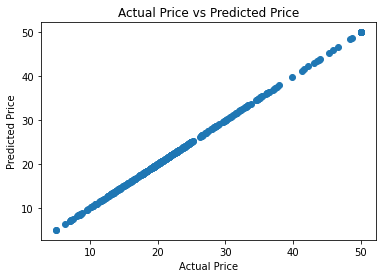

In [46]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [44]:
#pridiction on test data
test_data_prediction = model.predict(x_test)
# R squared error (comapring the data for accuracy)

score_3 = metrics.r2_score(y_test,test_data_prediction)

# Mean absolute error

score_4 = metrics.mean_absolute_error(y_test,test_data_prediction)

print('R squared error: ',score_3)
print('Mean absolute error : ',score_4)

R squared error:  0.7325248061538571
Mean absolute error :  2.7550827531253583


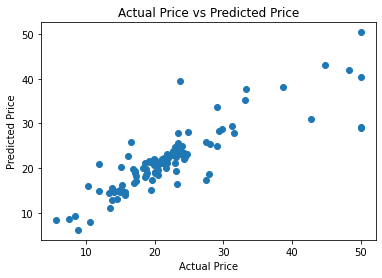

In [47]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()